In [1]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install kagglehub


Note: you may need to restart the kernel to use updated packages.


In [12]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("saurabhshahane/fake-news-classification")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\neelg\.cache\kagglehub\datasets\saurabhshahane\fake-news-classification\versions\77


In [14]:
import pandas as pd
import numpy as np
import os
df=pd.read_csv(os.path.join(path, 'WELFake_Dataset.csv'),index_col=0)
df

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...
72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


# Data Preprocessing

In [18]:
# I am deciding to drop the rows with no title or no text

In [19]:
df.dropna(subset=['title','text'],inplace=True)

In [20]:
df.isnull().any(axis=1)
#OK so null values have been dealt with

0        False
2        False
3        False
4        False
5        False
         ...  
72129    False
72130    False
72131    False
72132    False
72133    False
Length: 71537, dtype: bool

In [21]:

df.insert(1, 'content', df['title'] + " " + df['text'])


In [22]:
df

,title,content,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...","Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,About Time! Christian Group Sues Amazon and SP...,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
...,...,...,...,...
72129,Russians steal research on Trump in hack of U....,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,WATCH: Giuliani Demands That Democrats Apolog...,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,Trump tussle gives unpopular Mexican leader mu...,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [23]:
df.drop(columns=['title','text'],inplace=True) #since we already combined it

# Train Test split and textVectorize

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df['content'],df['label'] , test_size=1/3 , random_state=0)

print(type(X_train))

<class 'pandas.core.series.Series'>


In [27]:
y_train

21045    0
58553    0
16195    0
44384    1
37330    0
        ..
21385    1
46235    1
42930    1
43892    0
68839    1
Name: label, Length: 47691, dtype: int64

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(
    lowercase=True,
    stop_words='english',
    max_features=5000,
    strip_accents='unicode'
)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [29]:
X_train_vec

<47691x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 7130736 stored elements in Compressed Sparse Row format>

# Visualizing the Data


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

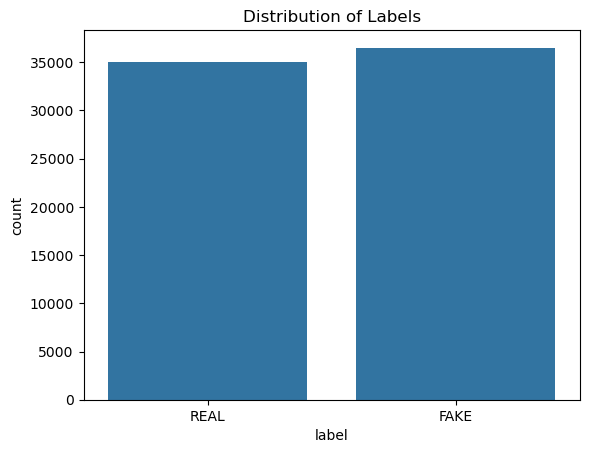

In [32]:
sns.countplot(data=df, x='label')
plt.xticks([0, 1], ['REAL', 'FAKE'])
plt.title("Distribution of Labels")
plt.show()

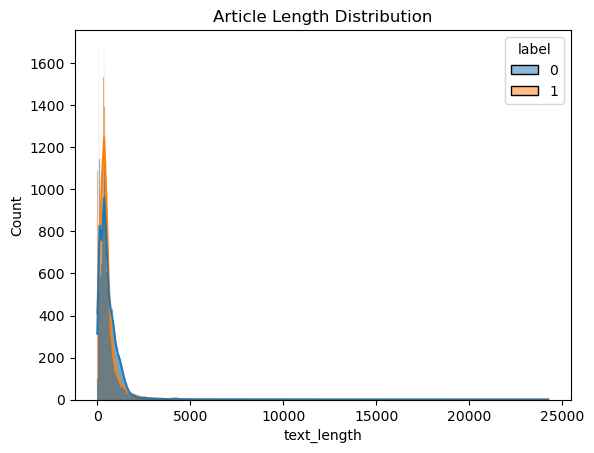

In [33]:
df['text_length'] = df['content'].apply(lambda x: len(str(x).split()))

sns.histplot(data=df, x='text_length', hue='label', kde=True)
plt.title("Article Length Distribution")
plt.show()

df.drop(columns=['text_length'],inplace=True)

In [34]:
#From this we can somehow understand that fake news tend to have less text length.

# Building the Model

In [40]:
#For this I will be using LogisticRegression


In [41]:
from sklearn.linear_model import LogisticRegression

model= LogisticRegression(class_weight='balanced')

model.fit(X_train_vec,y_train)

LogisticRegression(class_weight='balanced')

# Metrics CHeck

In [43]:
from sklearn.metrics import classification_report, accuracy_score

In [44]:
y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.940325421454332
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     11701
           1       0.94      0.94      0.94     12145

    accuracy                           0.94     23846
   macro avg       0.94      0.94      0.94     23846
weighted avg       0.94      0.94      0.94     23846



# 94% Accuracy Achieved

# Deployment of Model

In [47]:
import pickle

In [48]:
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)


with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [53]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.


In [54]:
streamlit --version

NameError: name 'streamlit' is not defined